In [254]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from plots import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [305]:
def least_squares(y, tx):
    N=y.shape[0]
    txt=np.transpose(tx)    
    w=(np.linalg.inv(txt@tx))@txt@y
    #w=np.linalg.pinv()
    #mse=1/(2*N)*(np.transpose(error)@error)
    return w
   #tx = tilde X has a columns of 1
   

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [306]:
from helpers import *
import sys
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)

    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    N=y.shape[0]
    minLoss=sys.maxsize
    minWeights=[0,0]
    for i in range (-10,10):
        for j in range(-10,10):
            w=[i,j]
            error=y-tx@w
            errorT=np.transpose(error)
            loss=1/(2*N)*errorT@error
            if(loss<minLoss):
                minWeights=w
                minLoss=loss
    print(minLoss)
    print(minWeights)
    return least_squares(y,tx)

Test it here

In [307]:
print(test_your_least_squares())

2092.27400283
[9, 9]
[ 73.293922    13.47971243]


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [258]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [310]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    n=x.shape[0]
    matr=np.ones(n,)[np.newaxis]

    for i in range(1,degree+1):
        xp=np.power(x,i)[np.newaxis]
        matr=np.append(matr,xp,axis=0)
    return np.transpose(matr)

def compute_rmse(y, tx, w):
    N=y.shape[0]
    error=np.subtract(y,tx@w)
    errorT=np.transpose(error)
    return np.sqrt(2*1/(2*N)*errorT@error)

    
#print(build_poly(np.array([1,2,3]),3).shape)

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [321]:
def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)
    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        poly=build_poly(x,degree)
       # raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
       # raise NotImplementedError
        weights=least_squares(y, poly)
        rmse=compute_rmse(y, poly, weights)

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737495
Processing 3th experiment, degree=7, rmse=0.24965870360908424
Processing 4th experiment, degree=12, rmse=0.926829452649977


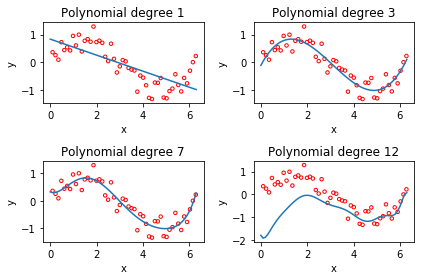

In [322]:
polynomial_regression()

# 2 Evaluating model predication performance


from randomLet us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [415]:
from random import shuffle

def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    #need to shuffle them
    np.random.seed(seed)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    N=x.shape[0]
    
    shuffle(x)
    shuffle(y)
    
    numTrain=(int)(np.round(ratio*N))
    numTest=N-numTrain
    trainX=x[0:numTrain]
    trainY=y[0:numTrain]
    testX=x[numTrain+1:N]
    testY=y[numTrain+1:N]
    return [trainX,trainY,testX,testY]

Then, test your `split_data` function below.

In [416]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    trainX,trainY,testX,testY=split_data(x,y,ratio)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    pTrainX=build_poly(trainX, degree)
    pTestX=build_poly(testX,degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    wTrain=least_squares(trainY, pTrainX)
    wTest=least_squares(testY, pTestX)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr=compute_rmse(trainY,pTrainX, wTrain)
    rmse_te=compute_rmse(testY,pTestX, wTest)
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [417]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)
    print()

proportion=0.9, degree=1, Training RMSE=0.706, Testing RMSE=0.680
proportion=0.9, degree=3, Training RMSE=0.653, Testing RMSE=0.000
proportion=0.9, degree=7, Training RMSE=0.655, Testing RMSE=0.346
proportion=0.9, degree=12, Training RMSE=0.671, Testing RMSE=1.813

proportion=0.5, degree=1, Training RMSE=0.778, Testing RMSE=0.600
proportion=0.5, degree=3, Training RMSE=0.665, Testing RMSE=0.703
proportion=0.5, degree=7, Training RMSE=0.638, Testing RMSE=0.586
proportion=0.5, degree=12, Training RMSE=0.496, Testing RMSE=2.180

proportion=0.1, degree=1, Training RMSE=0.487, Testing RMSE=0.710
proportion=0.1, degree=3, Training RMSE=0.389, Testing RMSE=0.664
proportion=0.1, degree=7, Training RMSE=0.366, Testing RMSE=0.577
proportion=0.1, degree=12, Training RMSE=2.200, Testing RMSE=0.645



# 3 Ridge Regression
Please fill in the function below.

In [422]:
from functools import reduce

def ridge_regression(y, tx,lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    w=least_squares(y, tx)
    N=y.shape[0]
    error=np.subtract(y,tx@w)
    errorT=np.transpose(error)
    l2Norm=lambda_*np.sum(w**2)
    return np.sqrt(1/(N)*errorT@error)+l2Norm
   

In [432]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    trainX,trainY,testX,testY=split_data(x, y, ratio)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    pTrainX=build_poly(trainX, degree)
    pTestX=build_poly(testX,degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        rmse_tr.append(ridge_regression(trainY, pTrainX,lambda_))
        rmse_te.append(ridge_regression(testY, pTestX,lambda_))
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)



proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.436, Testing RMSE=0.592
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.454, Testing RMSE=0.593
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.496, Testing RMSE=0.595
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.589, Testing RMSE=0.600
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.803, Testing RMSE=0.611
proportion=0.5, degree=7, lambda=0.001, Training RMSE=1.289, Testing RMSE=0.637
proportion=0.5, degree=7, lambda=0.001, Training RMSE=2.396, Testing RMSE=0.696
proportion=0.5, degree=7, lambda=0.003, Training RMSE=4.915, Testing RMSE=0.829
proportion=0.5, degree=7, lambda=0.007, Training RMSE=10.647, Testing RMSE=1.133
proportion=0.5, degree=7, lambda=0.016, Training RMSE=23.692, Testing RMSE=1.825
proportion=0.5, degree=7, lambda=0.037, Training RMSE=53.382, Testing RMSE=3.400
proportion=0.5, degree=7, lambda=0.085, Training RMSE=120.950, Testing RMSE=6.983
proportion=0.5, degree=7, lambda=0.

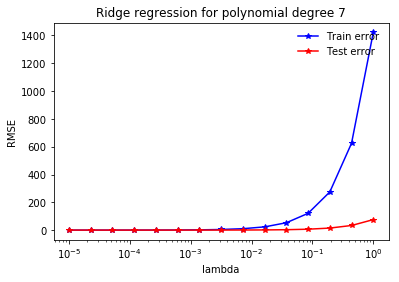

In [437]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)

In [413]:
x,y=load_data()
tx=build_poly(x,2)
ridge_regression(y,tx,0.5)

0.69569825736974766